# Exploratory Data analysis - EDA

In [50]:
# Importar liberías

import pandas as pd
import os

In [51]:
print(os.getcwd())

c:\Users\GrhgG\OneDrive\Documents\GitHub\final_project\src


In [52]:
df7 = pd.read_csv('../data/raw/Afluencia plazas (1).csv', encoding='latin1')
df7.fillna(0, inplace=True)
meses = {'ene': 1, 'feb': 2, 'mar': 3, 'abr': 4, 'may': 5, 'jun': 6,
         'jul': 7, 'ago': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dic': 12}

df7['mes'] = df7['Fecha'].str[:3].map(meses)
df7['año'] = '20' + df7['Fecha'].str[-2:]
cols_k = ['Interlomas', 'Pabellón Bosques', 'Oceanía', 'Samara']

def convertir_k(valor):
    if isinstance(valor, str) and 'k' in valor:
        return int(valor.replace('k', '').replace(',', '')) * 1000
    try:
        return int(valor)
    except:
        return valor  # No modifica fechas ni otros valores

for col in cols_k:
    if col in df7.columns:
        df7[col] = df7[col].apply(convertir_k)
df7.head()

,Fecha,Interlomas,Pabellón Bosques,Oceanía,Samara,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,mes,año
0,ene-24,850000,0,1371000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2024
1,feb-24,850000,0,1263000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2024
2,mar-24,850000,0,1400000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2024
3,abr-24,850000,0,1231000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2024
4,may-24,850000,0,1291000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2024


In [53]:
# Cargar insumos

df1 = pd.read_csv('../data/raw/encuentro_oceania_2024.csv', encoding='latin1', sep='\t')
df1.head()


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385


In [54]:
df1['mes'] = pd.to_datetime(df1['Fecha']).dt.month
df1['año'] = pd.to_datetime(df1['Fecha']).dt.year
df1.head()  


C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\1569150887.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['mes'] = pd.to_datetime(df1['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\1569150887.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['año'] = pd.to_datetime(df1['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12.0,2024.0
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12.0,2024.0
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12.0,2024.0
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12.0,2024.0
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12.0,2024.0


In [55]:
df7['mes'] = df7['mes'].astype(str)
df7['año'] = df7['año'].astype(str)
df7['mes_año'] = df7['mes'] + '-' + df7['año']

df1['mes_año'] = df1['mes'].astype(str) + '-' + df1['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df1 = df1.merge(df7[['mes_año', 'Oceanía']].rename(columns={'Oceanía': 'afluencia'}), on='mes_año', how='left')

if 'Oceanía' in df1.columns:
    df1.drop(columns=['Oceanía'], inplace=True)

df1.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12.0,2024.0,12.0-2024.0,NaN
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12.0,2024.0,12.0-2024.0,NaN
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12.0,2024.0,12.0-2024.0,NaN
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12.0,2024.0,12.0-2024.0,NaN
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12.0,2024.0,12.0-2024.0,NaN


In [56]:
df1['afluencia'] = df1['afluencia'].fillna(
    df1['mes_año'].map(df7.set_index('mes_año')['Oceanía'])
)

df1.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12.0,2024.0,12.0-2024.0,NaN
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12.0,2024.0,12.0-2024.0,NaN
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12.0,2024.0,12.0-2024.0,NaN
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12.0,2024.0,12.0-2024.0,NaN
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12.0,2024.0,12.0-2024.0,NaN


In [57]:
sin_afluencia = df1[df1['afluencia'].isna()]
print(sin_afluencia[['mes_año']])

         mes_año
0    12.0-2024.0
1    12.0-2024.0
2    12.0-2024.0
3    12.0-2024.0
4    12.0-2024.0
..           ...
333   1.0-2024.0
334   1.0-2024.0
335   1.0-2024.0
336   1.0-2024.0
337      nan-nan

[338 rows x 1 columns]


In [58]:
df1['mes'] = df1['mes'].fillna(1).astype(int)
df1['año'] = df1['año'].fillna(2024).astype(int)
df1['mes_año'] = df1['mes'].astype(str) + '-' + df1['año'].astype(str)

df7['mes'] = df7['mes'].fillna(1).astype(int)
df7['año'] = df7['año'].fillna(2024).astype(int)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df1['afluencia'] = df1['afluencia'].fillna(
    df1['mes_año'].map(df7.set_index('mes_año')['Oceanía'])
)

df1.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12,2024,12-2024,1696000.0
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12,2024,12-2024,1696000.0
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12,2024,12-2024,1696000.0
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12,2024,12-2024,1696000.0
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12,2024,12-2024,1696000.0


In [59]:
df2 = pd.read_csv('../data/raw/encuentro_oceania_2025.csv', encoding='latin1', sep='\t')
df2.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,31/08/2025,7.0,106,"13,762.93","2,202.07","15,965",150.613208,33,483.78787879
1,2,30/08/2025,6.0,690,"74,202.12","11,872.38","86,074.5",124.745652,149,577.68120805
2,3,29/08/2025,5.0,517,"42,157.87","6,745.13","48,903",94.589942,111,440.56756757
3,4,28/08/2025,4.0,781,"58,941.35","9,430.55","68,371.9",87.544046,174,392.94195402
4,5,27/08/2025,3.0,857,"55,538.92","8,886.28","64,425.2",75.175263,199,323.74472362


In [60]:
df2['mes'] = pd.to_datetime(df2['Fecha']).dt.month
df2['año'] = pd.to_datetime(df2['Fecha']).dt.year
df2.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\1351950684.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['mes'] = pd.to_datetime(df2['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\1351950684.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['año'] = pd.to_datetime(df2['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año
0,1,31/08/2025,7.0,106,"13,762.93","2,202.07","15,965",150.613208,33,483.78787879,8.0,2025.0
1,2,30/08/2025,6.0,690,"74,202.12","11,872.38","86,074.5",124.745652,149,577.68120805,8.0,2025.0
2,3,29/08/2025,5.0,517,"42,157.87","6,745.13","48,903",94.589942,111,440.56756757,8.0,2025.0
3,4,28/08/2025,4.0,781,"58,941.35","9,430.55","68,371.9",87.544046,174,392.94195402,8.0,2025.0
4,5,27/08/2025,3.0,857,"55,538.92","8,886.28","64,425.2",75.175263,199,323.74472362,8.0,2025.0


In [61]:
df2['mes_año'] = df2['mes'].astype(str) + '-' + df2['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df2 = df2.merge(df7[['mes_año', 'Oceanía']].rename(columns={'Oceanía': 'afluencia'}), on='mes_año', how='left')

if 'Oceanía' in df2.columns:
    df2.drop(columns=['Oceanía'], inplace=True)

df2.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,106,"13,762.93","2,202.07","15,965",150.613208,33,483.78787879,8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,690,"74,202.12","11,872.38","86,074.5",124.745652,149,577.68120805,8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,517,"42,157.87","6,745.13","48,903",94.589942,111,440.56756757,8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,781,"58,941.35","9,430.55","68,371.9",87.544046,174,392.94195402,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,857,"55,538.92","8,886.28","64,425.2",75.175263,199,323.74472362,8.0,2025.0,8.0-2025.0,NaN


In [62]:
df2['mes'] = df2['mes'].fillna(1).astype(int)
df2['año'] = df2['año'].fillna(2024).astype(int)
df2['mes_año'] = df2['mes'].astype(str) + '-' + df2['año'].astype(str)

df2['afluencia'] = df2['afluencia'].fillna(
    df2['mes_año'].map(df7.set_index('mes_año')['Oceanía'])
)

df2.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,106,"13,762.93","2,202.07","15,965",150.613208,33,483.78787879,8,2025,8-2025,1520000.0
1,2,30/08/2025,6.0,690,"74,202.12","11,872.38","86,074.5",124.745652,149,577.68120805,8,2025,8-2025,1520000.0
2,3,29/08/2025,5.0,517,"42,157.87","6,745.13","48,903",94.589942,111,440.56756757,8,2025,8-2025,1520000.0
3,4,28/08/2025,4.0,781,"58,941.35","9,430.55","68,371.9",87.544046,174,392.94195402,8,2025,8-2025,1520000.0
4,5,27/08/2025,3.0,857,"55,538.92","8,886.28","64,425.2",75.175263,199,323.74472362,8,2025,8-2025,1520000.0


In [63]:
df3 = pd.read_csv('../data/raw/interlomas_2024.csv', encoding='latin1', sep='\t')
df3.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,30/12/2024,1.0,285,"24,214.6755","3,874.3245","28,089",98.55789474,66,425.59090909
1,2,29/12/2024,7.0,428,"28,986.203","4,637.797","33,624",78.56074766,63,533.71428571
2,3,28/12/2024,6.0,388,"52,072.1531","8,331.5469","60,403.7",155.67963918,55,"1,098.24909091"
3,4,27/12/2024,5.0,552,"44,366.2227","7,098.5773","51,464.8",93.23333333,84,612.67619048
4,5,26/12/2024,4.0,563,"49,370.1762","7,899.2238","57,269.4",101.72184725,90,636.32666667


In [64]:
df3['mes'] = pd.to_datetime(df3['Fecha']).dt.month
df3['año'] = pd.to_datetime(df3['Fecha']).dt.year

df3.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\820475709.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df3['mes'] = pd.to_datetime(df3['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\820475709.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df3['año'] = pd.to_datetime(df3['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año
0,1,30/12/2024,1.0,285,"24,214.6755","3,874.3245","28,089",98.55789474,66,425.59090909,12.0,2024.0
1,2,29/12/2024,7.0,428,"28,986.203","4,637.797","33,624",78.56074766,63,533.71428571,12.0,2024.0
2,3,28/12/2024,6.0,388,"52,072.1531","8,331.5469","60,403.7",155.67963918,55,"1,098.24909091",12.0,2024.0
3,4,27/12/2024,5.0,552,"44,366.2227","7,098.5773","51,464.8",93.23333333,84,612.67619048,12.0,2024.0
4,5,26/12/2024,4.0,563,"49,370.1762","7,899.2238","57,269.4",101.72184725,90,636.32666667,12.0,2024.0


In [65]:
df3['mes_año'] = df3['mes'].astype(str) + '-' + df3['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df3 = df3.merge(df7[['mes_año', 'Interlomas']].rename(columns={'Interlomas': 'afluencia'}), on='mes_año', how='left')

if 'Interlomas' in df3.columns:
    df3.drop(columns=['Interlomas'], inplace=True)

df3.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,285,"24,214.6755","3,874.3245","28,089",98.55789474,66,425.59090909,12.0,2024.0,12.0-2024.0,NaN
1,2,29/12/2024,7.0,428,"28,986.203","4,637.797","33,624",78.56074766,63,533.71428571,12.0,2024.0,12.0-2024.0,NaN
2,3,28/12/2024,6.0,388,"52,072.1531","8,331.5469","60,403.7",155.67963918,55,"1,098.24909091",12.0,2024.0,12.0-2024.0,NaN
3,4,27/12/2024,5.0,552,"44,366.2227","7,098.5773","51,464.8",93.23333333,84,612.67619048,12.0,2024.0,12.0-2024.0,NaN
4,5,26/12/2024,4.0,563,"49,370.1762","7,899.2238","57,269.4",101.72184725,90,636.32666667,12.0,2024.0,12.0-2024.0,NaN


In [66]:
df3['mes'] = df3['mes'].fillna(1).astype(int)
df3['año'] = df3['año'].fillna(2024).astype(int)
df3['mes_año'] = df3['mes'].astype(str) + '-' + df3['año'].astype(str)

df3['afluencia'] = df3['afluencia'].fillna(
    df3['mes_año'].map(df7.set_index('mes_año')['Interlomas'])
)

df3.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,285,"24,214.6755","3,874.3245","28,089",98.55789474,66,425.59090909,12,2024,12-2024,889000.0
1,2,29/12/2024,7.0,428,"28,986.203","4,637.797","33,624",78.56074766,63,533.71428571,12,2024,12-2024,889000.0
2,3,28/12/2024,6.0,388,"52,072.1531","8,331.5469","60,403.7",155.67963918,55,"1,098.24909091",12,2024,12-2024,889000.0
3,4,27/12/2024,5.0,552,"44,366.2227","7,098.5773","51,464.8",93.23333333,84,612.67619048,12,2024,12-2024,889000.0
4,5,26/12/2024,4.0,563,"49,370.1762","7,899.2238","57,269.4",101.72184725,90,636.32666667,12,2024,12-2024,889000.0


In [67]:
df4 = pd.read_csv('../data/raw/interlomas_2025.csv', encoding='latin1', sep='\t')
df4.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,31/08/2025,7.0,97,"19,551.73","3,128.27","22,680",233.81443299,19,"1,193.68421053"
1,2,30/08/2025,6.0,713,"100,620.07","16,099.18","116,719.25",163.7016129,113,"1,032.91371681"
2,3,29/08/2025,5.0,378,"102,622.2","16,419.55","119,041.75",314.92526455,86,"1,384.20639535"
3,4,28/08/2025,4.0,319,"52,288.8","8,366.2","60,655",190.14106583,92,659.29347826
4,5,27/08/2025,3.0,369,"40,424.16","6,467.84","46,892",127.07859079,85,551.67058824


In [68]:
df4['mes'] = pd.to_datetime(df4['Fecha']).dt.month
df4['año'] = pd.to_datetime(df4['Fecha']).dt.year
df4.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\3593088143.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df4['mes'] = pd.to_datetime(df4['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\3593088143.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df4['año'] = pd.to_datetime(df4['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año
0,1,31/08/2025,7.0,97,"19,551.73","3,128.27","22,680",233.81443299,19,"1,193.68421053",8.0,2025.0
1,2,30/08/2025,6.0,713,"100,620.07","16,099.18","116,719.25",163.7016129,113,"1,032.91371681",8.0,2025.0
2,3,29/08/2025,5.0,378,"102,622.2","16,419.55","119,041.75",314.92526455,86,"1,384.20639535",8.0,2025.0
3,4,28/08/2025,4.0,319,"52,288.8","8,366.2","60,655",190.14106583,92,659.29347826,8.0,2025.0
4,5,27/08/2025,3.0,369,"40,424.16","6,467.84","46,892",127.07859079,85,551.67058824,8.0,2025.0


In [69]:
df4['mes_año'] = df4['mes'].astype(str) + '-' + df4['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df4 = df4.merge(df7[['mes_año', 'Interlomas']].rename(columns={'Interlomas': 'afluencia'}), on='mes_año', how='left')

if 'Interlomas' in df4.columns:
    df4.drop(columns=['Interlomas'], inplace=True)

df4.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,97,"19,551.73","3,128.27","22,680",233.81443299,19,"1,193.68421053",8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,713,"100,620.07","16,099.18","116,719.25",163.7016129,113,"1,032.91371681",8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,378,"102,622.2","16,419.55","119,041.75",314.92526455,86,"1,384.20639535",8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,319,"52,288.8","8,366.2","60,655",190.14106583,92,659.29347826,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,369,"40,424.16","6,467.84","46,892",127.07859079,85,551.67058824,8.0,2025.0,8.0-2025.0,NaN


In [70]:
df4['mes'] = df4['mes'].fillna(1).astype(int)
df4['año'] = df4['año'].fillna(2024).astype(int)
df4['mes_año'] = df4['mes'].astype(str) + '-' + df4['año'].astype(str)

df4['afluencia'] = df4['afluencia'].fillna(
    df4['mes_año'].map(df7.set_index('mes_año')['Interlomas'])
)

df4.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,97,"19,551.73","3,128.27","22,680",233.81443299,19,"1,193.68421053",8,2025,8-2025,855000.0
1,2,30/08/2025,6.0,713,"100,620.07","16,099.18","116,719.25",163.7016129,113,"1,032.91371681",8,2025,8-2025,855000.0
2,3,29/08/2025,5.0,378,"102,622.2","16,419.55","119,041.75",314.92526455,86,"1,384.20639535",8,2025,8-2025,855000.0
3,4,28/08/2025,4.0,319,"52,288.8","8,366.2","60,655",190.14106583,92,659.29347826,8,2025,8-2025,855000.0
4,5,27/08/2025,3.0,369,"40,424.16","6,467.84","46,892",127.07859079,85,551.67058824,8,2025,8-2025,855000.0


In [71]:
df5 = pd.read_csv('../data/raw/pabellon_2025.csv', encoding='latin1', sep='\t')
df5.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,31/08/2025,7.0,142,"28,607.75","4,577.25","33,185",233.697183,39,850.8974359
1,2,30/08/2025,6.0,507,"146,172.42","23,387.58","169,560",334.437870,78,"2,173.84615385"
2,3,29/08/2025,5.0,571,"73,981.06","11,836.94","85,818",150.294221,96,893.9375
3,4,28/08/2025,4.0,572,"87,983.26","14,077.34","102,060.6",178.427622,107,953.83738318
4,5,27/08/2025,3.0,458,"52,229.39","8,356.61","60,586",132.283843,87,696.3908046


In [72]:
df5['mes'] = pd.to_datetime(df5['Fecha']).dt.month
df5['año'] = pd.to_datetime(df5['Fecha']).dt.year
df5.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\868962788.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df5['mes'] = pd.to_datetime(df5['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\868962788.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df5['año'] = pd.to_datetime(df5['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año
0,1,31/08/2025,7.0,142,"28,607.75","4,577.25","33,185",233.697183,39,850.8974359,8.0,2025.0
1,2,30/08/2025,6.0,507,"146,172.42","23,387.58","169,560",334.437870,78,"2,173.84615385",8.0,2025.0
2,3,29/08/2025,5.0,571,"73,981.06","11,836.94","85,818",150.294221,96,893.9375,8.0,2025.0
3,4,28/08/2025,4.0,572,"87,983.26","14,077.34","102,060.6",178.427622,107,953.83738318,8.0,2025.0
4,5,27/08/2025,3.0,458,"52,229.39","8,356.61","60,586",132.283843,87,696.3908046,8.0,2025.0


In [73]:
df5['mes_año'] = df5['mes'].astype(str) + '-' + df5['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df5 = df5.merge(df7[['mes_año', 'Pabellón Bosques']].rename(columns={'Pabellón Bosques': 'afluencia'}), on='mes_año', how='left')

if 'Pabellón Bosques' in df5.columns:
    df5.drop(columns=['Pabellón Bosques'], inplace=True)

df5.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,142,"28,607.75","4,577.25","33,185",233.697183,39,850.8974359,8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,507,"146,172.42","23,387.58","169,560",334.437870,78,"2,173.84615385",8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,571,"73,981.06","11,836.94","85,818",150.294221,96,893.9375,8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,572,"87,983.26","14,077.34","102,060.6",178.427622,107,953.83738318,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,458,"52,229.39","8,356.61","60,586",132.283843,87,696.3908046,8.0,2025.0,8.0-2025.0,NaN


In [74]:
df5['mes'] = df5['mes'].fillna(1).astype(int)
df5['año'] = df5['año'].fillna(2024).astype(int)
df5['mes_año'] = df5['mes'].astype(str) + '-' + df5['año'].astype(str)

df5['afluencia'] = df5['afluencia'].fillna(
    df5['mes_año'].map(df7.set_index('mes_año')['Pabellón Bosques'])
)

df5.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,142,"28,607.75","4,577.25","33,185",233.697183,39,850.8974359,8,2025,8-2025,271000.0
1,2,30/08/2025,6.0,507,"146,172.42","23,387.58","169,560",334.437870,78,"2,173.84615385",8,2025,8-2025,271000.0
2,3,29/08/2025,5.0,571,"73,981.06","11,836.94","85,818",150.294221,96,893.9375,8,2025,8-2025,271000.0
3,4,28/08/2025,4.0,572,"87,983.26","14,077.34","102,060.6",178.427622,107,953.83738318,8,2025,8-2025,271000.0
4,5,27/08/2025,3.0,458,"52,229.39","8,356.61","60,586",132.283843,87,696.3908046,8,2025,8-2025,271000.0


In [75]:
df6 = pd.read_csv('../data/raw/satelite_2025.csv', encoding='latin1', sep='\t')
df6.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc
0,1,31/08/2025,7.0,133,"24,222.39","3,875.61","28,098",211.263158,34,826.41176471
1,2,30/08/2025,6.0,590,"80,663.74","12,906.26","93,570",158.593220,124,754.59677419
2,3,29/08/2025,5.0,822,"102,779.35","16,444.65","119,224",145.041363,153,779.24183007
3,4,28/08/2025,4.0,960,"68,409.74","10,945.56","79,355.3",82.661771,135,587.81703704
4,5,27/08/2025,3.0,803,"88,655.16","14,184.84","102,840",128.069738,169,608.52071006


In [76]:
df6['mes'] = pd.to_datetime(df6['Fecha']).dt.month
df6['año'] = pd.to_datetime(df6['Fecha']).dt.year
df6.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\263753723.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df6['mes'] = pd.to_datetime(df6['Fecha']).dt.month
C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\263753723.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df6['año'] = pd.to_datetime(df6['Fecha']).dt.year


,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año
0,1,31/08/2025,7.0,133,"24,222.39","3,875.61","28,098",211.263158,34,826.41176471,8.0,2025.0
1,2,30/08/2025,6.0,590,"80,663.74","12,906.26","93,570",158.593220,124,754.59677419,8.0,2025.0
2,3,29/08/2025,5.0,822,"102,779.35","16,444.65","119,224",145.041363,153,779.24183007,8.0,2025.0
3,4,28/08/2025,4.0,960,"68,409.74","10,945.56","79,355.3",82.661771,135,587.81703704,8.0,2025.0
4,5,27/08/2025,3.0,803,"88,655.16","14,184.84","102,840",128.069738,169,608.52071006,8.0,2025.0


In [77]:
df6['mes_año'] = df6['mes'].astype(str) + '-' + df6['año'].astype(str)
df7['mes_año'] = df7['mes'].astype(str) + '-' + df7['año'].astype(str)

df6 = df6.merge(df7[['mes_año', 'Samara']].rename(columns={'Samara': 'afluencia'}), on='mes_año', how='left')

if 'Samara' in df6.columns:
    df6.drop(columns=['Samara'], inplace=True)

df6.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,133,"24,222.39","3,875.61","28,098",211.263158,34,826.41176471,8.0,2025.0,8.0-2025.0,NaN
1,2,30/08/2025,6.0,590,"80,663.74","12,906.26","93,570",158.593220,124,754.59677419,8.0,2025.0,8.0-2025.0,NaN
2,3,29/08/2025,5.0,822,"102,779.35","16,444.65","119,224",145.041363,153,779.24183007,8.0,2025.0,8.0-2025.0,NaN
3,4,28/08/2025,4.0,960,"68,409.74","10,945.56","79,355.3",82.661771,135,587.81703704,8.0,2025.0,8.0-2025.0,NaN
4,5,27/08/2025,3.0,803,"88,655.16","14,184.84","102,840",128.069738,169,608.52071006,8.0,2025.0,8.0-2025.0,NaN


In [78]:
df6['mes'] = df6['mes'].fillna(1).astype(int)
df6['año'] = df6['año'].fillna(2024).astype(int)
df6['mes_año'] = df6['mes'].astype(str) + '-' + df6['año'].astype(str)

df6['afluencia'] = df6['afluencia'].fillna(
    df6['mes_año'].map(df7.set_index('mes_año')['Samara'])
)

df6.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,31/08/2025,7.0,133,"24,222.39","3,875.61","28,098",211.263158,34,826.41176471,8,2025,8-2025,281000.0
1,2,30/08/2025,6.0,590,"80,663.74","12,906.26","93,570",158.593220,124,754.59677419,8,2025,8-2025,281000.0
2,3,29/08/2025,5.0,822,"102,779.35","16,444.65","119,224",145.041363,153,779.24183007,8,2025,8-2025,281000.0
3,4,28/08/2025,4.0,960,"68,409.74","10,945.56","79,355.3",82.661771,135,587.81703704,8,2025,8-2025,281000.0
4,5,27/08/2025,3.0,803,"88,655.16","14,184.84","102,840",128.069738,169,608.52071006,8,2025,8-2025,281000.0


In [79]:
df_total = pd.concat([df1, df2, df3, df4, df5, df6], axis=0, ignore_index=True)
df_total.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12,2024,12-2024,1696000.0
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12,2024,12-2024,1696000.0
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12,2024,12-2024,1696000.0
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12,2024,12-2024,1696000.0
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12,2024,12-2024,1696000.0


In [80]:
df_total.duplicated().sum()


np.int64(0)

In [81]:
df_total.drop_duplicates(inplace=True)

df_total.head()

,Unnamed: 0,Fecha,Día de la Semana,Uds.V,Base,Impuestos,Neto,Venta/Uds,Docs,Venta/Doc,mes,año,mes_año,afluencia
0,1,30/12/2024,1.0,271,"22,769.4","3,643.1","26,412.5",97.46309963,85,310.73529412,12,2024,12-2024,1696000.0
1,2,29/12/2024,7.0,786,"80,439.665","12,870.335","93,310",118.71501272,143,652.51748252,12,2024,12-2024,1696000.0
2,3,28/12/2024,6.0,620,"67,399.1359","10,783.8641","78,183",126.1016129,114,685.81578947,12,2024,12-2024,1696000.0
3,4,27/12/2024,5.0,492,"40,806.8961","6,529.1039","47,336",96.21138211,103,459.57281553,12,2024,12-2024,1696000.0
4,5,26/12/2024,4.0,224,"19,525.0008","3,123.9992","22,649",101.11160714,65,348.44615385,12,2024,12-2024,1696000.0


In [82]:
print("df_total:", df_total.isnull().sum().sum())

df_total: 12


In [83]:
cols_to_drop = ['Uds.V','Base','Impuestos','Venta/Uds','Docs','Venta/Doc','mes_año']
df_total.drop([col for col in cols_to_drop if col in df_total.columns], axis=1, inplace=True)
df_total.head()

,Unnamed: 0,Fecha,Día de la Semana,Neto,mes,año,afluencia
0,1,30/12/2024,1.0,"26,412.5",12,2024,1696000.0
1,2,29/12/2024,7.0,"93,310",12,2024,1696000.0
2,3,28/12/2024,6.0,"78,183",12,2024,1696000.0
3,4,27/12/2024,5.0,"47,336",12,2024,1696000.0
4,5,26/12/2024,4.0,"22,649",12,2024,1696000.0


In [84]:
# Quita solo las comas de la columna Neto
df_total['Neto'] = df_total['Neto'].astype(str).str.replace(',', '')

# Convierte a float64
df_total['Neto'] = pd.to_numeric(df_total['Neto'], errors='coerce')

df_total.head()

,Unnamed: 0,Fecha,Día de la Semana,Neto,mes,año,afluencia
0,1,30/12/2024,1.0,26412.5,12,2024,1696000.0
1,2,29/12/2024,7.0,93310.0,12,2024,1696000.0
2,3,28/12/2024,6.0,78183.0,12,2024,1696000.0
3,4,27/12/2024,5.0,47336.0,12,2024,1696000.0
4,5,26/12/2024,4.0,22649.0,12,2024,1696000.0


In [85]:
df_total['Fecha'] = pd.to_datetime(df_total['Fecha'])
df_total.head()

C:\Users\GrhgG\AppData\Local\Temp\ipykernel_7688\3492710553.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_total['Fecha'] = pd.to_datetime(df_total['Fecha'])


,Unnamed: 0,Fecha,Día de la Semana,Neto,mes,año,afluencia
0,1,2024-12-30,1.0,26412.5,12,2024,1696000.0
1,2,2024-12-29,7.0,93310.0,12,2024,1696000.0
2,3,2024-12-28,6.0,78183.0,12,2024,1696000.0
3,4,2024-12-27,5.0,47336.0,12,2024,1696000.0
4,5,2024-12-26,4.0,22649.0,12,2024,1696000.0


In [86]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1349 entries, 0 to 1348
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1349 non-null   int64         
 1   Fecha             1343 non-null   datetime64[ns]
 2   Día de la Semana  1343 non-null   float64       
 3   Neto              1349 non-null   float64       
 4   mes               1349 non-null   int64         
 5   año               1349 non-null   int64         
 6   afluencia         1349 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 73.9 KB


In [87]:
df_total = df_total.dropna()
df_total.drop_duplicates(inplace=True)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1343 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        1343 non-null   int64         
 1   Fecha             1343 non-null   datetime64[ns]
 2   Día de la Semana  1343 non-null   float64       
 3   Neto              1343 non-null   float64       
 4   mes               1343 non-null   int64         
 5   año               1343 non-null   int64         
 6   afluencia         1343 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 83.9 KB


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

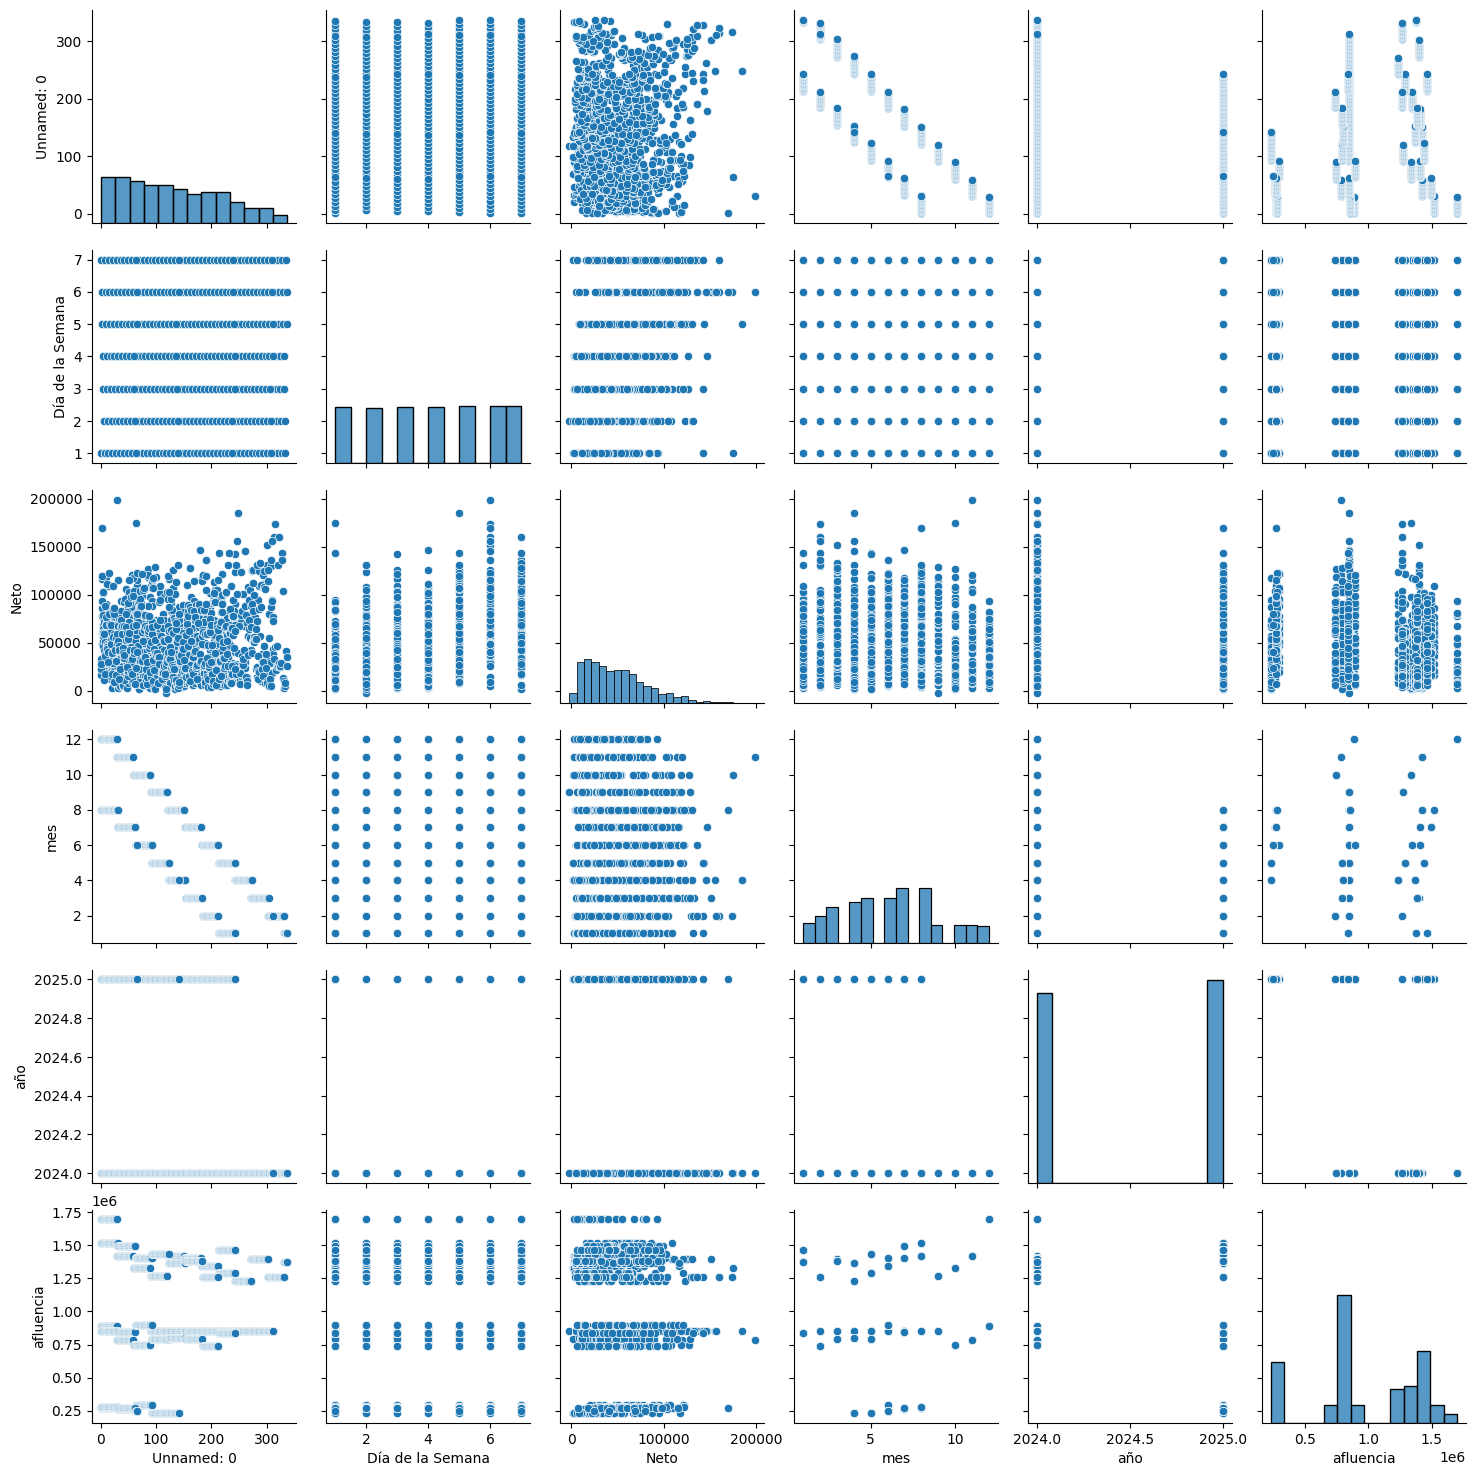

In [89]:
sns.pairplot(data=df_total)
plt.show()

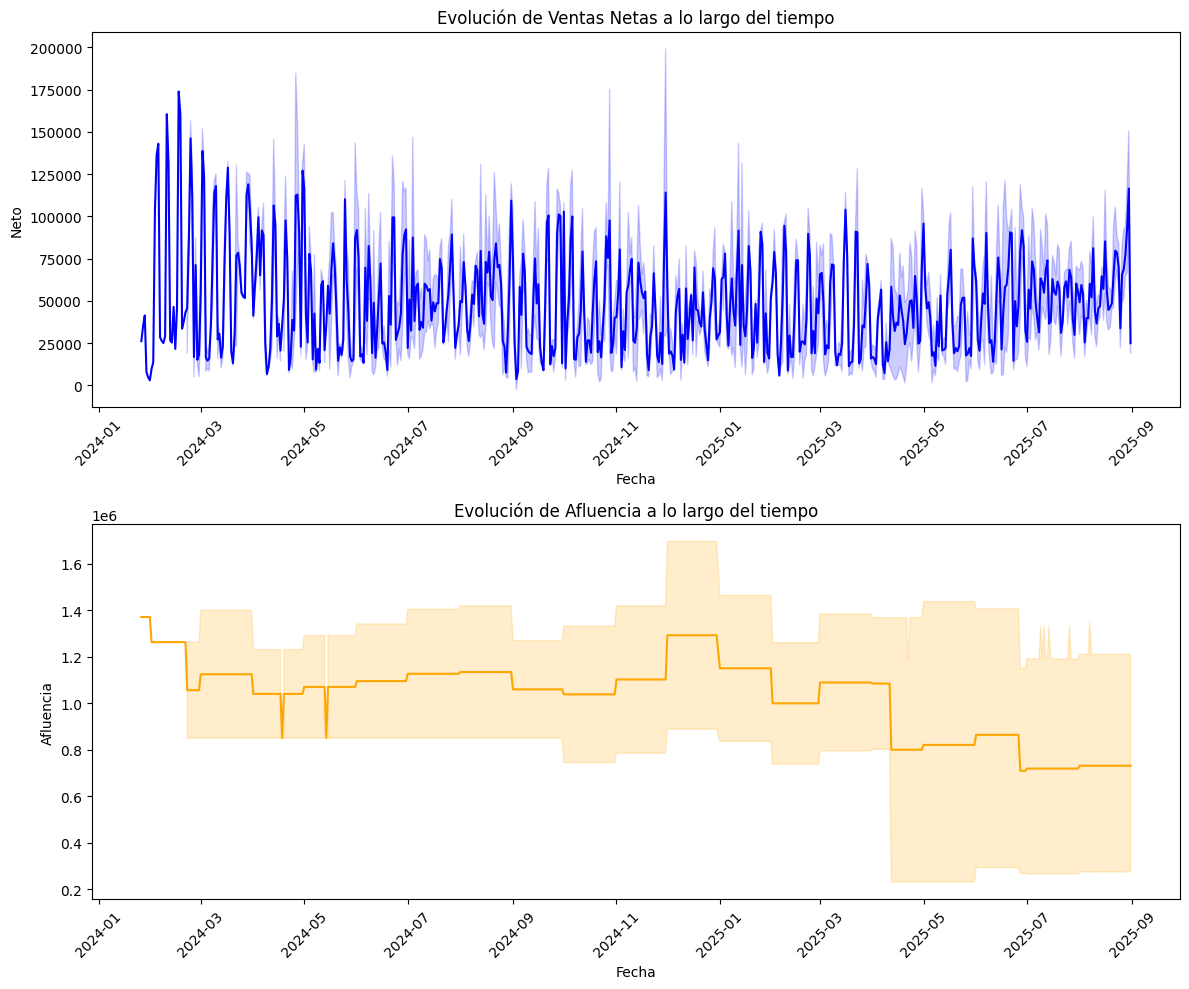

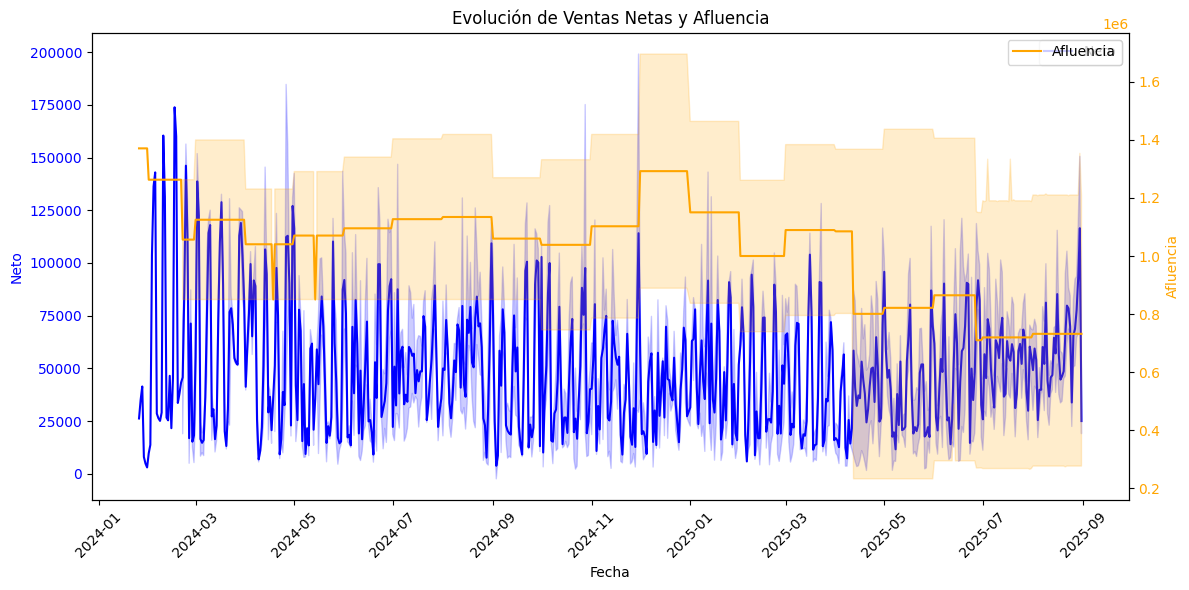

In [90]:
# Lineplot con Neto y Afluencia en gráficos separados
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Primer gráfico: Neto por fecha
sns.lineplot(data=df_total, x='Fecha', y='Neto', ax=ax1, color='blue')
ax1.set_title('Evolución de Ventas Netas a lo largo del tiempo')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Neto')
ax1.tick_params(axis='x', rotation=45)

# Segundo gráfico: Afluencia por fecha
sns.lineplot(data=df_total, x='Fecha', y='afluencia', ax=ax2, color='orange')
ax2.set_title('Evolución de Afluencia a lo largo del tiempo')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Afluencia')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Lineplot con doble eje Y para comparar Neto y Afluencia
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje Y izquierdo para Neto
sns.lineplot(data=df_total, x='Fecha', y='Neto', ax=ax1, color='blue', label='Neto')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Neto', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)

# Eje Y derecho para Afluencia
ax2 = ax1.twinx()
sns.lineplot(data=df_total, x='Fecha', y='afluencia', ax=ax2, color='orange', label='Afluencia')
ax2.set_ylabel('Afluencia', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Evolución de Ventas Netas y Afluencia')
plt.tight_layout()
plt.show()

In [91]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


X = df_total[['afluencia']].copy()  
y = df_total['Neto'].copy()  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(
    n_estimators=100,        
    max_depth=10,           
    random_state=42,
    n_jobs=-1              
)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


print("=== Evaluación del Modelo Random Forest ===")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")



=== Evaluación del Modelo Random Forest ===
Error Cuadrático Medio (MSE): 834684930.63
Raíz del Error Cuadrático Medio (RMSE): 28890.91
Error Absoluto Medio (MAE): 23395.39
Coeficiente de Determinación (R²): 0.1085


In [92]:
from xgboost import XGBRegressor
model= XGBRegressor(random_state=42)
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [93]:
y_pred= model.predict(X_test)
y_pred

array([65189.2  , 43307.527, 58841.355, 36701.176, 47887.61 , 69330.79 ,
       59291.656, 33153.547, 38767.508, 65189.2  , 50248.715, 65189.2  ,
       31996.035, 40639.54 , 47887.61 , 67379.27 , 65189.2  , 55020.465,
       33560.934, 33560.934, 43307.527, 47887.61 , 67379.27 , 31996.035,
       36701.176, 43307.527, 46130.453, 65189.2  , 72337.945, 61676.027,
       57584.637, 46130.453, 33560.934, 32625.396, 47887.61 , 69330.79 ,
       49853.65 , 43307.527, 33560.934, 34691.375, 34691.375, 40639.54 ,
       30548.855, 32625.396, 55020.465, 67379.27 , 34691.375, 23076.213,
       32625.396, 33153.547, 57584.637, 64100.15 , 65189.2  , 63510.996,
       38767.508, 72337.945, 31256.98 , 49853.65 , 65189.2  , 64100.15 ,
       61676.027, 61676.027, 38767.508, 57584.637, 59653.69 , 31996.035,
       63510.996, 65189.2  , 38767.508, 55020.465, 34691.375, 40639.54 ,
       64100.15 , 46130.453, 30548.855, 34570.812, 43025.87 , 49431.23 ,
       30548.855, 52493.895, 57584.637, 49853.65 , 

In [94]:


print("=== EVALUACIÓN DEL MODELO XGBOOST ===")

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)



print(f"Error Cuadrático Medio (MSE): {mse_xgb:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_xgb:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_xgb:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_xgb:.4f}")









=== EVALUACIÓN DEL MODELO XGBOOST ===
Error Cuadrático Medio (MSE): 831442078.84
Raíz del Error Cuadrático Medio (RMSE): 28834.74
Error Absoluto Medio (MAE): 23375.76
Coeficiente de Determinación (R²): 0.1120


In [95]:
# ...existing code...
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor

print("=== OPTIMIZACIÓN DE HIPERPARÁMETROS XGBOOST ===")

# Definir grid de parámetros para optimizar
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization
    'reg_lambda': [0.1, 0.5, 1.0, 2.0]  # L2 regularization
}

# Usar RandomizedSearchCV para ser más eficiente
xgb_model = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    xgb_model,
    param_grid,
    n_iter=50,  # Número de combinaciones a probar
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

print("Ejecutando optimización de hiperparámetros...")
random_search.fit(X_train, y_train)

print(f"Mejores parámetros: {random_search.best_params_}")
print(f"Mejor score CV: {random_search.best_score_:.4f}")

# Usar el mejor modelo
best_xgb_model = random_search.best_estimator_

=== OPTIMIZACIÓN DE HIPERPARÁMETROS XGBOOST ===
Ejecutando optimización de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros: {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Mejor score CV: 0.0999



=== INGENIERÍA DE CARACTERÍSTICAS ===
Características disponibles: 15
['afluencia', 'mes', 'dia_semana', 'trimestre', 'es_fin_semana', 'es_inicio_mes', 'es_fin_mes', 'afluencia_log', 'afluencia_sqrt', 'afluencia_ma_7', 'afluencia_ma_30', 'afluencia_std_7', 'afluencia_lag_1', 'afluencia_lag_7', 'diferencia_ma_7']
Datos mejorados: (1343, 15)

=== PREPROCESSING AVANZADO ===
Características seleccionadas: ['afluencia', 'dia_semana', 'trimestre', 'es_fin_semana', 'es_fin_mes', 'afluencia_log', 'afluencia_sqrt', 'afluencia_ma_7', 'afluencia_lag_1', 'diferencia_ma_7']

=== MODELO XGBOOST OPTIMIZADO ===
=== RESULTADOS DEL MODELO OPTIMIZADO ===
MSE: 785188923.63
R²: 0.4159
MAE: 19728.74
MAPE: 73.90%
Accuracy: 41.59%

=== COMPARACIÓN DE MODELOS ===
XGBoost Original R²: 0.1120 (11.20%)
XGBoost Optimizado R²: 0.4159 (41.59%)
Mejora: 271.3%
🏆 El modelo optimizado es MEJOR


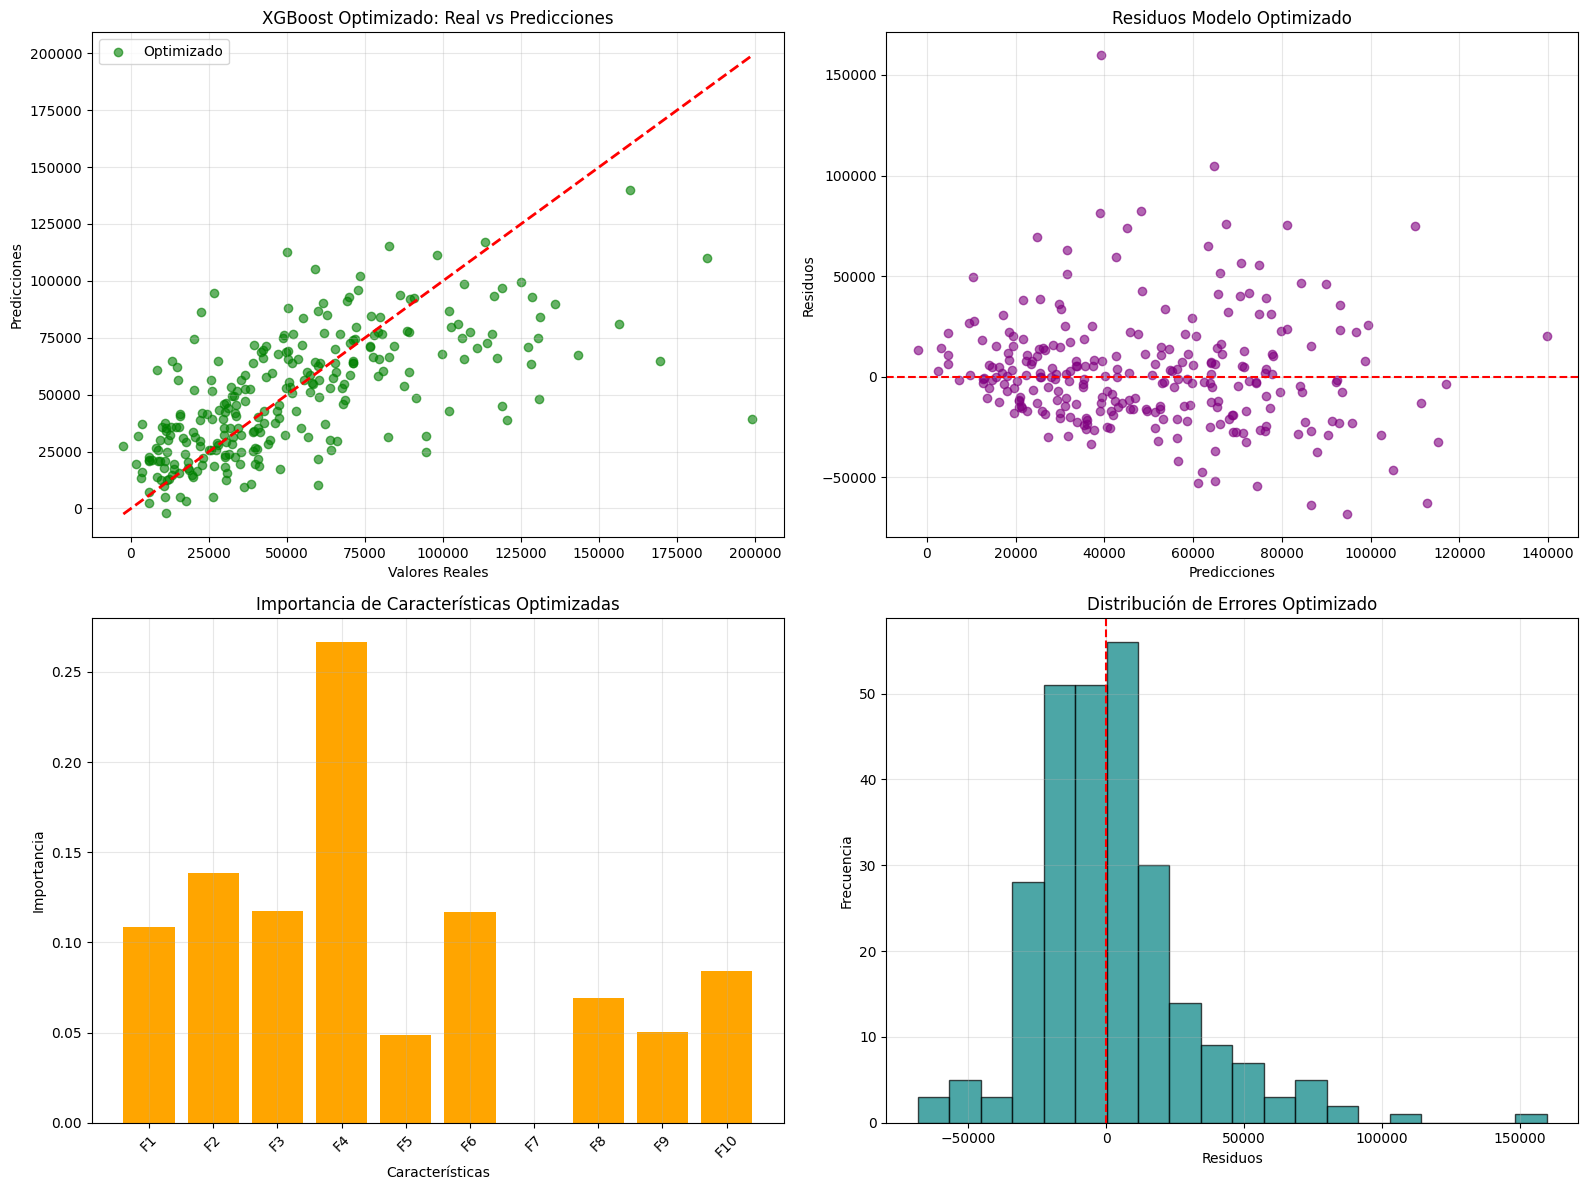


=== CARACTERÍSTICAS MÁS IMPORTANTES ===
1. es_fin_semana: 0.2665
2. dia_semana: 0.1384
3. trimestre: 0.1172
4. afluencia_log: 0.1168
5. afluencia: 0.1087


In [96]:
# ...existing code...
print("\n=== INGENIERÍA DE CARACTERÍSTICAS ===")

# Crear dataset mejorado con más características
df_enhanced = df_total.copy()

# Características temporales
df_enhanced['mes'] = df_enhanced['Fecha'].dt.month
df_enhanced['dia_semana'] = df_enhanced['Fecha'].dt.dayofweek
df_enhanced['dia_mes'] = df_enhanced['Fecha'].dt.day
df_enhanced['trimestre'] = df_enhanced['Fecha'].dt.quarter
df_enhanced['es_fin_semana'] = (df_enhanced['dia_semana'] >= 5).astype(int)
df_enhanced['es_inicio_mes'] = (df_enhanced['dia_mes'] <= 7).astype(int)
df_enhanced['es_fin_mes'] = (df_enhanced['dia_mes'] >= 24).astype(int)

# Características de afluencia transformadas
df_enhanced['afluencia_log'] = np.log1p(df_enhanced['afluencia'])
df_enhanced['afluencia_sqrt'] = np.sqrt(df_enhanced['afluencia'])
df_enhanced['afluencia_squared'] = df_enhanced['afluencia'] ** 2

# Medias móviles y estadísticas deslizantes
df_enhanced = df_enhanced.sort_values('Fecha')
df_enhanced['afluencia_ma_7'] = df_enhanced['afluencia'].rolling(window=7, min_periods=1).mean()
df_enhanced['afluencia_ma_30'] = df_enhanced['afluencia'].rolling(window=30, min_periods=1).mean()
df_enhanced['afluencia_std_7'] = df_enhanced['afluencia'].rolling(window=7, min_periods=1).std().fillna(0)

# Lag features (características rezagadas)
df_enhanced['afluencia_lag_1'] = df_enhanced['afluencia'].shift(1).fillna(df_enhanced['afluencia'].mean())
df_enhanced['afluencia_lag_7'] = df_enhanced['afluencia'].shift(7).fillna(df_enhanced['afluencia'].mean())

# Características derivadas
df_enhanced['diferencia_ma_7'] = df_enhanced['afluencia'] - df_enhanced['afluencia_ma_7']

# Seleccionar características mejoradas
feature_columns = [
    'afluencia', 'mes', 'dia_semana', 'trimestre', 'es_fin_semana',
    'es_inicio_mes', 'es_fin_mes', 'afluencia_log', 'afluencia_sqrt',
    'afluencia_ma_7', 'afluencia_ma_30', 'afluencia_std_7',
    'afluencia_lag_1', 'afluencia_lag_7', 'diferencia_ma_7'
]

# Verificar características disponibles
available_features = [col for col in feature_columns if col in df_enhanced.columns]
print(f"Características disponibles: {len(available_features)}")
print(available_features)

X_enhanced = df_enhanced[available_features].dropna()
y_enhanced = df_enhanced.loc[X_enhanced.index, 'Neto']

print(f"Datos mejorados: {X_enhanced.shape}")

print("\n=== PREPROCESSING AVANZADO ===")

# Dividir datos mejorados
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced, y_enhanced, test_size=0.2, random_state=42
)

# Escalado robusto (mejor para outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_enh)
X_test_scaled = scaler.transform(X_test_enh)

# Selección de características más importantes
selector = SelectKBest(score_func=f_regression, k=10)  # Seleccionar top 10
X_train_selected = selector.fit_transform(X_train_scaled, y_train_enh)
X_test_selected = selector.transform(X_test_scaled)

# Obtener nombres de características seleccionadas
selected_features = [available_features[i] for i in selector.get_support(indices=True)]
print(f"Características seleccionadas: {selected_features}")

print("\n=== MODELO XGBOOST OPTIMIZADO ===")

# Crear modelo con mejores parámetros
optimized_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42
)

# Entrenar modelo optimizado
optimized_xgb.fit(X_train_selected, y_train_enh)

# Predicciones del modelo optimizado
y_pred_opt = optimized_xgb.predict(X_test_selected)

# Evaluar modelo optimizado
mse_opt = mean_squared_error(y_test_enh, y_pred_opt)
r2_opt = r2_score(y_test_enh, y_pred_opt)
mae_opt = mean_absolute_error(y_test_enh, y_pred_opt)
mape_opt = np.mean(np.abs((y_test_enh - y_pred_opt) / y_test_enh)) * 100

print("=== RESULTADOS DEL MODELO OPTIMIZADO ===")
print(f"MSE: {mse_opt:.2f}")
print(f"R²: {r2_opt:.4f}")
print(f"MAE: {mae_opt:.2f}")
print(f"MAPE: {mape_opt:.2f}%")
print(f"Accuracy: {r2_opt*100:.2f}%")

# Comparación con modelo original
print(f"\n=== COMPARACIÓN DE MODELOS ===")
try:
    print(f"XGBoost Original R²: {r2_xgb:.4f} ({r2_xgb*100:.2f}%)")
    print(f"XGBoost Optimizado R²: {r2_opt:.4f} ({r2_opt*100:.2f}%)")
    
    mejora = ((r2_opt - r2_xgb) / r2_xgb) * 100
    print(f"Mejora: {mejora:.1f}%")
    
    if r2_opt > r2_xgb:
        print("🏆 El modelo optimizado es MEJOR")
    else:
        print("⚠️ El modelo original sigue siendo mejor")
except:
    print("Ejecuta primero el modelo XGBoost original")

# Visualización mejorada
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Gráfico 1: Comparación Real vs Predicciones
ax1.scatter(y_test_enh, y_pred_opt, alpha=0.6, color='green', label='Optimizado')
ax1.plot([y_test_enh.min(), y_test_enh.max()], [y_test_enh.min(), y_test_enh.max()], 'r--', lw=2)
ax1.set_xlabel('Valores Reales')
ax1.set_ylabel('Predicciones')
ax1.set_title('XGBoost Optimizado: Real vs Predicciones')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Residuos del modelo optimizado
residuos_opt = y_test_enh - y_pred_opt
ax2.scatter(y_pred_opt, residuos_opt, alpha=0.6, color='purple')
ax2.axhline(y=0, color='r', linestyle='--')
ax2.set_xlabel('Predicciones')
ax2.set_ylabel('Residuos')
ax2.set_title('Residuos Modelo Optimizado')
ax2.grid(True, alpha=0.3)

# Gráfico 3: Importancia de características seleccionadas
importancia_opt = optimized_xgb.feature_importances_
ax3.bar(range(len(importancia_opt)), importancia_opt, color='orange')
ax3.set_xlabel('Características')
ax3.set_ylabel('Importancia')
ax3.set_title('Importancia de Características Optimizadas')
ax3.set_xticks(range(len(selected_features)))
ax3.set_xticklabels([f'F{i+1}' for i in range(len(selected_features))], rotation=45)
ax3.grid(True, alpha=0.3)

# Gráfico 4: Distribución de errores
ax4.hist(residuos_opt, bins=20, alpha=0.7, color='teal', edgecolor='black')
ax4.set_xlabel('Residuos')
ax4.set_ylabel('Frecuencia')
ax4.set_title('Distribución de Errores Optimizado')
ax4.axvline(x=0, color='r', linestyle='--')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Mostrar características más importantes
print(f"\n=== CARACTERÍSTICAS MÁS IMPORTANTES ===")
feature_importance = list(zip(selected_features, importancia_opt))
feature_importance.sort(key=lambda x: x[1], reverse=True)

for i, (feature, importance) in enumerate(feature_importance[:5]):
    print(f"{i+1}. {feature}: {importance:.4f}")

In [99]:
# ...existing code...
print("\n=== MODELO XGBOOST OPTIMIZADO ===")

# Crear modelo con mejores parámetros
optimized_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.1,
    reg_lambda=1.0,
    random_state=42,
    early_stopping_rounds=10,
    eval_metric='rmse'
)

# Entrenar con validación temprana
optimized_xgb.fit(
    X_train_selected, y_train_enh,
    eval_set=[(X_test_selected, y_test_enh)],
    verbose=False
)

# Predicciones del modelo optimizado
y_pred_opt = optimized_xgb.predict(X_test_selected)

# Evaluar modelo optimizado
mse_opt = mean_squared_error(y_test_enh, y_pred_opt)
r2_opt = r2_score(y_test_enh, y_pred_opt)
mae_opt = mean_absolute_error(y_test_enh, y_pred_opt)
mape_opt = np.mean(np.abs((y_test_enh - y_pred_opt) / y_test_enh)) * 100

print("=== RESULTADOS DEL MODELO OPTIMIZADO ===")
print(f"MSE: {mse_opt:.2f}")
print(f"R²: {r2_opt:.4f}")
print(f"MAE: {mae_opt:.2f}")
print(f"MAPE: {mape_opt:.2f}%")
print(f"Accuracy: {r2_opt*100:.2f}%")


=== MODELO XGBOOST OPTIMIZADO ===
=== RESULTADOS DEL MODELO OPTIMIZADO ===
MSE: 687497714.13
R²: 0.4885
MAE: 18818.81
MAPE: 76.75%
Accuracy: 48.85%


In [104]:
# ...existing code...
print("=== EVALUACIÓN DEL MODELO XGBOOST ===")

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)
mae_xgb = mean_absolute_error(y_test, y_pred)
mape_xgb = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Agregar esta línea

print(f"Error Cuadrático Medio (MSE): {mse_xgb:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_xgb:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_xgb:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_xgb:.4f}")
print(f"Error Porcentual Absoluto Medio (MAPE): {mape_xgb:.2f}%")  # Agregar esta línea

=== EVALUACIÓN DEL MODELO XGBOOST ===
Error Cuadrático Medio (MSE): 831442078.84
Raíz del Error Cuadrático Medio (RMSE): 28834.74
Error Absoluto Medio (MAE): 23375.76
Coeficiente de Determinación (R²): 0.1120
Error Porcentual Absoluto Medio (MAPE): 119.71%



=== COMPARACIÓN FINAL ===
Comparación de métodos:
XGBoost Original:
  R²: 0.1120 (11.20%)
  MAPE: 119.71%

XGBoost Optimizado:
  R²: 0.4885 (48.85%)
  MAPE: 76.75%

Ensemble:
  R²: 0.4488 (44.88%)
  MAPE: 74.66%

🏆 Mejor método: XGBoost Optimizado
   R²: 0.4885
   MAPE: 76.75%


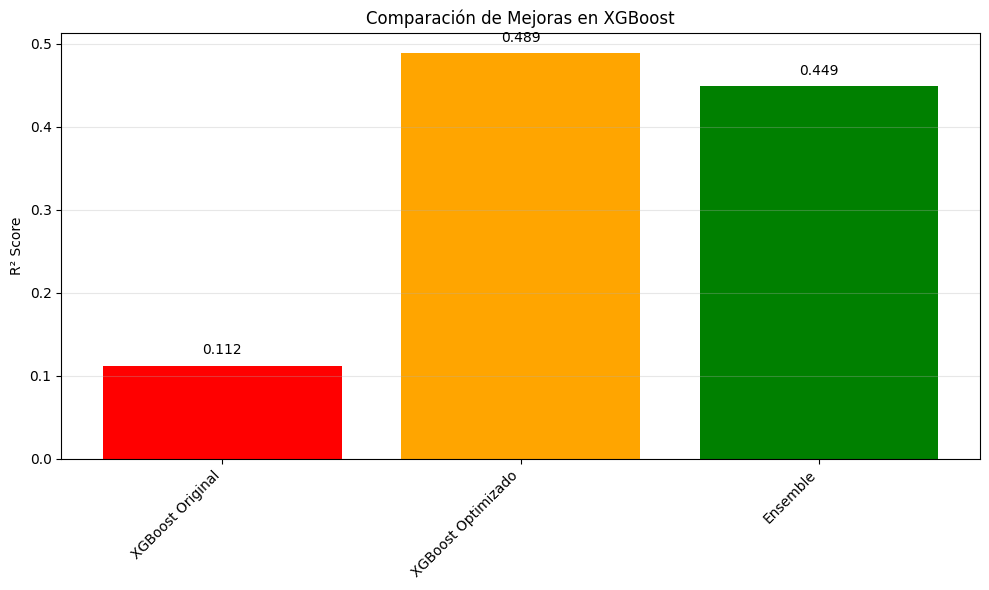

In [105]:
# ...existing code...
print("\n=== COMPARACIÓN FINAL ===")

# Recopilar todos los resultados
results = {
    'XGBoost Original': {'r2': r2_xgb, 'mape': mape_xgb},  # Cambiar 'mape' por 'mape_xgb'
    'XGBoost Optimizado': {'r2': r2_opt, 'mape': mape_opt},
    'Ensemble': {'r2': r2_ensemble, 'mape': mape_ensemble}
}

print("Comparación de métodos:")
for method, metrics in results.items():
    print(f"{method}:")
    print(f"  R²: {metrics['r2']:.4f} ({metrics['r2']*100:.2f}%)")
    print(f"  MAPE: {metrics['mape']:.2f}%")
    print()

# Encontrar el mejor método
best_method = max(results.items(), key=lambda x: x[1]['r2'])
print(f"🏆 Mejor método: {best_method[0]}")
print(f"   R²: {best_method[1]['r2']:.4f}")
print(f"   MAPE: {best_method[1]['mape']:.2f}%")

# Visualización de mejoras
methods = list(results.keys())
r2_scores = [results[m]['r2'] for m in methods]

plt.figure(figsize=(10, 6))
bars = plt.bar(methods, r2_scores, color=['red', 'orange', 'green'])
plt.title('Comparación de Mejoras en XGBoost')
plt.ylabel('R² Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar, score in zip(bars, r2_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()